In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.cuda
import torch.optim as optim
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.optim import SGD
from torch.nn import BCELoss
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# torch.cuda.set_device(0)
print('Using device:', device)


print('SETUP COMPLETED')

Using matplotlib backend: agg
Using device: cpu
SETUP COMPLETED


In [2]:
# train_df.select_dtypes(include=['object']).describe()

In [3]:
# test_df.select_dtypes(include=['object']).describe()

# Data Preprocessing

In [4]:
column_types = {'TransactionID': 'int32', 'isFraud': 'int8', 'TransactionDT': 'int32', 'TransactionAmt': 'float32', 'ProductCD': 'object', 'card1': 'int16', 'card2': 'float32', 'card3': 'float32', 'card4': 'object', 'card5': 'float32', 'card6': 'object', 'addr1': 'float32', 'addr2': 'float32', 'dist1': 'float32', 'dist2': 'float32', 'P_emaildomain': 'object', 'R_emaildomain': 'object', 'C1': 'float32', 'C2': 'float32', 'C3': 'float32', 'C4': 'float32', 'C5': 'float32', 'C6': 'float32', 'C7': 'float32', 'C8': 'float32', 'C9': 'float32', 'C10': 'float32', 'C11': 'float32', 'C12': 'float32', 'C13': 'float32', 'C14': 'float32', 'D1': 'float32', 'D2': 'float32', 'D3': 'float32', 'D4': 'float32', 'D5': 'float32', 'D6': 'float32', 'D7': 'float32', 'D8': 'float32', 'D9': 'float32', 'D10': 'float32', 'D11': 'float32', 'D12': 'float32', 'D13': 'float32', 'D14': 'float32', 'D15': 'float32', 'M1': 'object', 'M2': 'object', 'M3': 'object', 'M4': 'object', 'M5': 'object', 'M6': 'object', 'M7': 'object', 'M8': 'object', 'M9': 'object', 'V1': 'float32', 'V2': 'float32', 'V3': 'float32', 'V4': 'float32', 'V5': 'float32', 'V6': 'float32', 'V7': 'float32', 'V8': 'float32', 'V9': 'float32', 'V10': 'float32', 'V11': 'float32', 'V12': 'float32', 'V13': 'float32', 'V14': 'float32', 'V15': 'float32', 'V16': 'float32', 'V17': 'float32', 'V18': 'float32', 'V19': 'float32', 'V20': 'float32', 'V21': 'float32', 'V22': 'float32', 'V23': 'float32', 'V24': 'float32', 'V25': 'float32', 'V26': 'float32', 'V27': 'float32', 'V28': 'float32', 'V29': 'float32', 'V30': 'float32', 'V31': 'float32', 'V32': 'float32', 'V33': 'float32', 'V34': 'float32', 'V35': 'float32', 'V36': 'float32', 'V37': 'float32', 'V38': 'float32', 'V39': 'float32', 'V40': 'float32', 'V41': 'float32', 'V42': 'float32', 'V43': 'float32', 'V44': 'float32', 'V45': 'float32', 'V46': 'float32', 'V47': 'float32', 'V48': 'float32', 'V49': 'float32', 'V50': 'float32', 'V51': 'float32', 'V52': 'float32', 'V53': 'float32', 'V54': 'float32', 'V55': 'float32', 'V56': 'float32', 'V57': 'float32', 'V58': 'float32', 'V59': 'float32', 'V60': 'float32', 'V61': 'float32', 'V62': 'float32', 'V63': 'float32', 'V64': 'float32', 'V65': 'float32', 'V66': 'float32', 'V67': 'float32', 'V68': 'float32', 'V69': 'float32', 'V70': 'float32', 'V71': 'float32', 'V72': 'float32', 'V73': 'float32', 'V74': 'float32', 'V75': 'float32', 'V76': 'float32', 'V77': 'float32', 'V78': 'float32', 'V79': 'float32', 'V80': 'float32', 'V81': 'float32', 'V82': 'float32', 'V83': 'float32', 'V84': 'float32', 'V85': 'float32', 'V86': 'float32', 'V87': 'float32', 'V88': 'float32', 'V89': 'float32', 'V90': 'float32', 'V91': 'float32', 'V92': 'float32', 'V93': 'float32', 'V94': 'float32', 'V95': 'float32', 'V96': 'float32', 'V97': 'float32', 'V98': 'float32', 'V99': 'float32', 'V100': 'float32', 'V101': 'float32', 'V102': 'float32', 'V103': 'float32', 'V104': 'float32', 'V105': 'float32', 'V106': 'float32', 'V107': 'float32', 'V108': 'float32', 'V109': 'float32', 'V110': 'float32', 'V111': 'float32', 'V112': 'float32', 'V113': 'float32', 'V114': 'float32', 'V115': 'float32', 'V116': 'float32', 'V117': 'float32', 'V118': 'float32', 'V119': 'float32', 'V120': 'float32', 'V121': 'float32', 'V122': 'float32', 'V123': 'float32', 'V124': 'float32', 'V125': 'float32', 'V126': 'float32', 'V127': 'float32', 'V128': 'float32', 'V129': 'float32', 'V130': 'float32', 'V131': 'float32', 'V132': 'float32', 'V133': 'float32', 'V134': 'float32', 'V135': 'float32', 'V136': 'float32', 'V137': 'float32', 'V138': 'float32', 'V139': 'float32', 'V140': 'float32', 'V141': 'float32', 'V142': 'float32', 'V143': 'float32', 'V144': 'float32', 'V145': 'float32', 'V146': 'float32', 'V147': 'float32', 'V148': 'float32', 'V149': 'float32', 'V150': 'float32', 'V151': 'float32', 'V152': 'float32', 'V153': 'float32', 'V154': 'float32', 'V155': 'float32', 'V156': 'float32', 'V157': 'float32', 'V158': 'float32', 'V159': 'float32', 'V160': 'float32', 'V161': 'float32', 'V162': 'float32', 'V163': 'float32', 'V164': 'float32', 'V165': 'float32', 'V166': 'float32', 'V167': 'float32', 'V168': 'float32', 'V169': 'float32', 'V170': 'float32', 'V171': 'float32', 'V172': 'float32', 'V173': 'float32', 'V174': 'float32', 'V175': 'float32', 'V176': 'float32', 'V177': 'float32', 'V178': 'float32', 'V179': 'float32', 'V180': 'float32', 'V181': 'float32', 'V182': 'float32', 'V183': 'float32', 'V184': 'float32', 'V185': 'float32', 'V186': 'float32', 'V187': 'float32', 'V188': 'float32', 'V189': 'float32', 'V190': 'float32', 'V191': 'float32', 'V192': 'float32', 'V193': 'float32', 'V194': 'float32', 'V195': 'float32', 'V196': 'float32', 'V197': 'float32', 'V198': 'float32', 'V199': 'float32', 'V200': 'float32', 'V201': 'float32', 'V202': 'float32', 'V203': 'float32', 'V204': 'float32', 'V205': 'float32', 'V206': 'float32', 'V207': 'float32', 'V208': 'float32', 'V209': 'float32', 'V210': 'float32', 'V211': 'float32', 'V212': 'float32', 'V213': 'float32', 'V214': 'float32', 'V215': 'float32', 'V216': 'float32', 'V217': 'float32', 'V218': 'float32', 'V219': 'float32', 'V220': 'float32', 'V221': 'float32', 'V222': 'float32', 'V223': 'float32', 'V224': 'float32', 'V225': 'float32', 'V226': 'float32', 'V227': 'float32', 'V228': 'float32', 'V229': 'float32', 'V230': 'float32', 'V231': 'float32', 'V232': 'float32', 'V233': 'float32', 'V234': 'float32', 'V235': 'float32', 'V236': 'float32', 'V237': 'float32', 'V238': 'float32', 'V239': 'float32', 'V240': 'float32', 'V241': 'float32', 'V242': 'float32', 'V243': 'float32', 'V244': 'float32', 'V245': 'float32', 'V246': 'float32', 'V247': 'float32', 'V248': 'float32', 'V249': 'float32', 'V250': 'float32', 'V251': 'float32', 'V252': 'float32', 'V253': 'float32', 'V254': 'float32', 'V255': 'float32', 'V256': 'float32', 'V257': 'float32', 'V258': 'float32', 'V259': 'float32', 'V260': 'float32', 'V261': 'float32', 'V262': 'float32', 'V263': 'float32', 'V264': 'float32', 'V265': 'float32', 'V266': 'float32', 'V267': 'float32', 'V268': 'float32', 'V269': 'float32', 'V270': 'float32', 'V271': 'float32', 'V272': 'float32', 'V273': 'float32', 'V274': 'float32', 'V275': 'float32', 'V276': 'float32', 'V277': 'float32', 'V278': 'float32', 'V279': 'float32', 'V280': 'float32', 'V281': 'float32', 'V282': 'float32', 'V283': 'float32', 'V284': 'float32', 'V285': 'float32', 'V286': 'float32', 'V287': 'float32', 'V288': 'float32', 'V289': 'float32', 'V290': 'float32', 'V291': 'float32', 'V292': 'float32', 'V293': 'float32', 'V294': 'float32', 'V295': 'float32', 'V296': 'float32', 'V297': 'float32', 'V298': 'float32', 'V299': 'float32', 'V300': 'float32', 'V301': 'float32', 'V302': 'float32', 'V303': 'float32', 'V304': 'float32', 'V305': 'float32', 'V306': 'float32', 'V307': 'float32', 'V308': 'float32', 'V309': 'float32', 'V310': 'float32', 'V311': 'float32', 'V312': 'float32', 'V313': 'float32', 'V314': 'float32', 'V315': 'float32', 'V316': 'float32', 'V317': 'float32', 'V318': 'float32', 'V319': 'float32', 'V320': 'float32', 'V321': 'float32', 'V322': 'float32', 'V323': 'float32', 'V324': 'float32', 'V325': 'float32', 'V326': 'float32', 'V327': 'float32', 'V328': 'float32', 'V329': 'float32', 'V330': 'float32', 'V331': 'float32', 'V332': 'float32', 'V333': 'float32', 'V334': 'float32', 'V335': 'float32', 'V336': 'float32', 'V337': 'float32', 'V338': 'float32', 'V339': 'float32'}

In [5]:
train_df = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv',dtype=column_types)

In [6]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_y = train_df['isFraud']
train_df.drop('isFraud',axis=1,inplace=True)

In [8]:
categorical_cols = [cname for cname in train_df.columns if
                    train_df[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in train_df.columns if 
                  train_df[cname].dtype in ['int8', 'int16', 'int32', 'float32']]

In [9]:
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')), ('scale', StandardScaler())])


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),
                                           ('onehot', OneHotEncoder(dtype=np.int8, handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [10]:
train_df = preprocessor.fit_transform(train_df)
print('DONE')

DONE


In [11]:
train_y = train_y.values

In [12]:
train_df.shape

(590540, 543)

In [13]:
train_tmp, valid_tmp, y_train_tmp, y_valid_tmp = train_test_split(train_df,train_y, stratify=train_y)
print(train_tmp.shape[0])
print(valid_tmp.shape[0])

442905
147635


In [14]:
train_tmp = torch.from_numpy(train_tmp).to(device)
y_train_tmp = torch.from_numpy(y_train_tmp).type(torch.LongTensor).to(device)
valid_tmp = torch.from_numpy(valid_tmp).to(device)
y_valid_tmp = torch.from_numpy(y_valid_tmp).type(torch.LongTensor).to(device)
print('DONE')

DONE


In [15]:
train_loader = torch.utils.data.TensorDataset(train_tmp,y_train_tmp)
valid_loader = torch.utils.data.TensorDataset(valid_tmp,y_valid_tmp)

In [16]:
train_loader = torch.utils.data.DataLoader(train_loader, batch_size = 29527, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_loader, batch_size = 147635, shuffle = False)

# Neuronal Network

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(543, 256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,1)
        
        self.dropout = nn.Dropout(p= 0.2, inplace = True)
        
    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.sigmoid(self.fc4(x))
        return x

In [18]:
net = Net()
net.to(device)
print(net)

Net(
  (fc1): Linear(in_features=543, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace)
)


In [19]:
criterion = BCELoss()
optimizer = Adam(net.parameters())
# optimizer = SGD(net.parameters(), lr=0.01, momentum=0.9)

In [20]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation accuracy increased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [21]:
patience = 25
early_stopping = EarlyStopping(patience=patience, verbose=True)

In [22]:
train_auroc_list, valid_auroc_list = [], []
epochs = 13
print('CALCULATION STARTED....')
for epoch in range(1, epochs+1):
    train_hat_list, valid_hat_list, train_true_list, valid_true_list = [], [], [], []
    for (train_samples, train_targets) in train_loader:
        optimizer.zero_grad()
        net_out = net(train_samples.float())
        loss = criterion(net_out, train_targets.float())
        loss.backward()
        optimizer.step()
        for iterrr,ittter in zip(net_out, train_targets):
            train_hat_list.append(iterrr.item())
            train_true_list.append(ittter.item())
    with torch.no_grad():
        net.eval()
        for valid_samples, valid_targets in valid_loader:
            val_out = net(valid_samples.float())
            for iiiter,iteeer in zip(val_out, valid_targets):
                valid_hat_list.append(iiiter.item())
                valid_true_list.append(iteeer.item())
    net.train()
    train_accuracy_auroc = roc_auc_score(train_true_list, train_hat_list)
    train_auroc_list.append(train_accuracy_auroc)
    print()
    print('train true shape: ', len(train_true_list), 'train hat shape', len(train_hat_list))
    valid_accuracy_auroc = roc_auc_score(valid_true_list, valid_hat_list)
    valid_auroc_list.append(valid_accuracy_auroc) 
    print('valid true shape: ', len(valid_true_list), 'valid hat shape', len(valid_hat_list))
    print()                  
    print("Epoch: {} of It's Over 9000! | TRAIN roc auc score: {} | VALID roc auc score: {}".format(epoch, train_accuracy_auroc, valid_accuracy_auroc))        
#     early_stopping(valid_accuracy_auroc, net)
        
#     if early_stopping.early_stop:
#         print("Early stopping")
#         break
            
# net.load_state_dict(torch.load('checkpoint.pt'))

CALCULATION STARTED....

train true shape:  442905 train hat shape 442905
valid true shape:  147635 valid hat shape 147635

Epoch: 1 of It's Over 9000! | TRAIN roc auc score: 0.4926812558689295 | VALID roc auc score: 0.7492873931153872

train true shape:  442905 train hat shape 442905
valid true shape:  147635 valid hat shape 147635

Epoch: 2 of It's Over 9000! | TRAIN roc auc score: 0.7726034275261133 | VALID roc auc score: 0.8154586825412776

train true shape:  442905 train hat shape 442905
valid true shape:  147635 valid hat shape 147635

Epoch: 3 of It's Over 9000! | TRAIN roc auc score: 0.8013968424315709 | VALID roc auc score: 0.8271430285027508

train true shape:  442905 train hat shape 442905
valid true shape:  147635 valid hat shape 147635

Epoch: 4 of It's Over 9000! | TRAIN roc auc score: 0.8119284860535316 | VALID roc auc score: 0.8349271073843676

train true shape:  442905 train hat shape 442905
valid true shape:  147635 valid hat shape 147635

Epoch: 5 of It's Over 9000! 

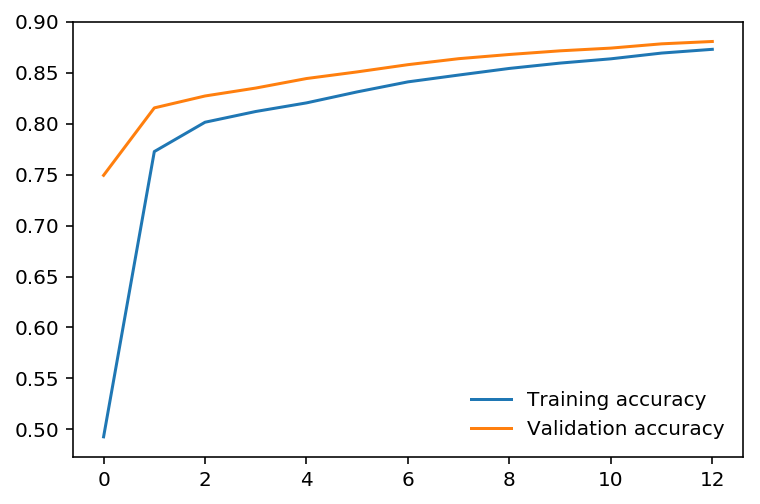

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_auroc_list, label='Training accuracy')
plt.plot(valid_auroc_list, label='Validation accuracy')
plt.legend(frameon=False)

In [24]:
submit_np = pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv',dtype=column_types)
sub = pd.read_csv('../input/ieee-fraud-detection/sample_submission.csv')

In [25]:
submit_np = preprocessor.transform(submit_np)
print('DONE')
submit_np.shape

DONE


(506691, 543)

In [26]:
submit_np = torch.from_numpy(submit_np).to(device)

fake_labels = np.zeros(submit_np.shape)
fake_labels = torch.from_numpy(fake_labels).to(device)

submit_np = torch.utils.data.TensorDataset(submit_np, fake_labels)

submit_np = torch.utils.data.DataLoader(submit_np, batch_size = 506691, shuffle = False)

In [27]:
submission = []
with torch.no_grad():
    net.eval()
    for samples, _ in submit_np:
        log_ps = net(samples.float())
        for prediction in log_ps:
            submission.append(prediction.item())
        
submit_np = pd.Series(submission)
sub['isFraud'] = submit_np

In [28]:
sub.describe()

,TransactionID,isFraud
count,5.066910e+05,506691.000000
mean,3.916894e+06,0.039107
std,1.462692e+05,0.118045
min,3.663549e+06,0.000000
25%,3.790222e+06,0.003617
50%,3.916894e+06,0.009323
75%,4.043566e+06,0.025486
max,4.170239e+06,1.000000


In [29]:
sub.tail()

,TransactionID,isFraud
506686,4170235,0.021506
506687,4170236,0.022376
506688,4170237,0.007308
506689,4170238,0.011250
506690,4170239,0.119931


In [30]:
sub.to_csv('submission.csv',index=False)
print('NOTEBOOK DONE')

NOTEBOOK DONE
